In [1]:
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]

import matplotlib as mpl
import matplotlib.pyplot as plt
some_digit = X[0]
#X[0]:in last note book we saw that it is 5
some_digit_image = some_digit.reshape(28, 28)


import numpy as np
y = y.astype(np.uint8)

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [2]:
#only try to identify one digit for example 5
#a binary classifier, capable of distinguishing between just two classes, 5 and not-5
y_train_5 = (y_train == 5)  # True for all 5s, False other digits
y_test_5 = (y_test == 5)


In [4]:
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,method="predict_proba")

/home/elahe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/elahe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/elahe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [6]:
from sklearn.metrics import roc_curve
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

In [9]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal
    [...] # Add axis labels and grid

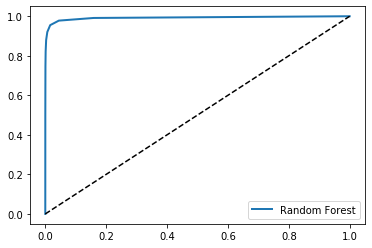

In [10]:
#plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()
#compared with SGD,its ROC curve is much closer to the top-left corner, and it has a greater AUC

In [11]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores_forest)
#for SGD it was 0.96

0.9920527492698306

In [15]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)

/home/elahe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/elahe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/elahe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [16]:
#finding recall and precision
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.986046511627907

In [17]:
recall_score(y_train_5,y_train_pred)

0.8212506917542889

In [18]:
#This is not bad :))